# Authorship Attribution and the Federalist Papers 
### 📝 Author: [GABRIEL ALBERNAZ '26, Gemini, GitHub Copilot] | 📅 Date: [April 2025] (full project log in README.txt)

#### 📌 Description:
This project replicates and extends the authorship attribution analysis of the Federalist Papers conducted by Jockers and Witten (2010). Using machine learning techniques, including clustering and classification algorithms, the study aims to confirm the authorship of known papers and generate evidence to predict the authorship of the disputed and co-authored papers.(Gemini - 04/03)
<p></p>


## **Introduction**

Authorship attribution is the process of determining the author of a given text based on its linguistic and stylistic features. By analyzing patterns such as word usage, sentence structure, and vocabulary, computational methods can identify the most likely author of a document.

The Federalist Papers, a collection of 85 essays written in the late 18th century to promote the ratification of the United States Constitution, were authored by Alexander Hamilton, James Madison, and John Jay. While the authorship of most papers is well-established, there are 12 disputed papers and several co-authored ones, which have been the subject of extensive scholarly debate.

Jockers and Witten conducted a comprehensive comparison of machine learning methods for authorship attribution using the Federalist Papers corpus. They evaluated several classifiers—including Support Vector Machines (SVM), k-nearest neighbors, regularized discriminant analysis (RDA), and nearest shrunken centroids (NSC)—across raw and pre-processed word and bigram features. Their findings consistently attributed nearly all disputed papers to Madison, with NSC and RDA achieving the highest accuracy and confidence. Notably, the NSC classifier assigned every disputed and co-authored paper to Madison with exceptionally high probabilities, reinforcing earlier research while also demonstrating the strength of regularized classification techniques in stylometric analysis (Jockers & Witten, 2010).

In this notebook, we will:
- Import and preprocess datasets containing 1-gram and 2-gram word frequencies from the Federalist Papers.
- Explore and clean the data by removing unnecessary rows, renaming columns, and checking for null values or duplicates.
- Visualize data distributions and patterns using bar plots, heatmaps, and line plots.
- Perform clustering analysis, including K-means and hierarchical clustering, to group papers based on stylistic similarities.
- Apply dimensionality reduction techniques like PCA to handle high-dimensional data and improve clustering efficiency.
- Train and evaluate classification models (e.g., Decision Trees, SVM, Naive Bayes) to predict authorship of disputed papers.
- Use cross-validation to assess model performance and ensure robustness.
- Predict authorship of disputed and co-authored papers using trained models.
- Document findings and insights from clustering and classification analyses.


## **Imports**

In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import export_text, plot_tree
from sklearn import svm
from sklearn.metrics import homogeneity_score
from sklearn.naive_bayes import MultinomialNB



## **Reading the Data**

The initial file has proportional counts of “single” (1-gram) words that appear in all of the 85 texts. 
The second file has the proportional counts of “word pairs” (bigrams or 2-grams). This second file 
may contain some bi-grams that do not always appear in each text, that is, some zeros may appear 
if an author did not use that bi-gram in a specific text. Rows are for each text and the columns 
indicate the word usage proportions for each “token” used in that text.

The analysis utilizes pre-processed 1-gram and bi-gram proportional counts of words from the Federalist Papers to identify stylistic patterns indicative of individual authors. These files were produced with the Lexos web app (Kleinman et al., 2019). For each file, scrubbing settings were: whitespace (newlines, tabs, runs of spaces) denote “word” boundaries; convert everything to lowercase; remove digits; remove any punctuation except keep apostrophes (e.g., “we’d” is kept as one token); hyphens were removed; no stop words were removed. 

In [437]:
filename1_single = "lexos_1gram_inALL_prop.csv"
filename2_bigrams = "lexos_2gram_prop.csv"

# Load the CSV files into Pandas DataFrames
df_1gram = pd.read_csv(filename1_single)
df_2gram = pd.read_csv(filename2_bigrams)


Let's look at the 1-gram dataframe

In [438]:
# First look at the 1-gram dataframe
df_1gram

,Unnamed: 0,the,of,to,and,in,a,be,that,it,...,extremities,extremes,extremely,extravagancies,extravagance,extraneous,extracts,extra,extortion,zealous
0,Total,7.9135,5.2608,3.1772,2.2978,1.9614,1.7622,1.7418,1.2402,1.1308,...,0.0006,0.0034,0.0029,0.0005,0.0014,0.0008,0.0007,0.001,0.0002,0.0035
1,Average,0.0931,0.0619,0.0374,0.0270,0.0231,0.0207,0.0205,0.0146,0.0133,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
2,FED_18_C,0.1136,0.0639,0.0256,0.0374,0.0194,0.0175,0.0028,0.0099,0.0123,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
3,FED_19_C,0.1015,0.0610,0.0288,0.0400,0.0200,0.0132,0.0068,0.0063,0.0093,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
4,FED_20_C,0.0901,0.0533,0.0276,0.0355,0.0257,0.0184,0.0046,0.0059,0.0079,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,FED_44_M,0.1086,0.0590,0.0279,0.0303,0.0228,0.0148,0.0186,0.0097,0.0066,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
83,FED_45_M,0.1308,0.0673,0.0311,0.0296,0.0188,0.0094,0.0245,0.0141,0.0089,...,0.0000,0.0000,0.0005,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
84,FED_46_M,0.1156,0.0618,0.0328,0.0279,0.0176,0.0160,0.0275,0.0149,0.0122,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
85,FED_47_M,0.1191,0.0681,0.0237,0.0313,0.0226,0.0128,0.0128,0.0131,0.0080,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000


And now the 2-gram data

In [439]:
df_2gram

,Unnamed: 0,of the,to the,in the,to be,that the,it is,by the,the people,of a,...,for nominating,for not,for nothing,for objection,for objections,for obtaining,for offenses,for on,for one,zealous they
0,Total,1.7870,0.6686,0.6390,0.3951,0.2944,0.2634,0.2578,0.2582,0.2456,...,0.0005,0.0015,0.0009,0.0003,0.0003,0.0009,0.0013,0.0007,0.0013,0.0004
1,Average,0.0210,0.0079,0.0075,0.0046,0.0035,0.0031,0.0030,0.0030,0.0029,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,FED_18_C,0.0251,0.0066,0.0085,0.0014,0.0033,0.0028,0.0033,0.0009,0.0005,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,FED_19_C,0.0200,0.0054,0.0059,0.0024,0.0039,0.0010,0.0049,0.0010,0.0005,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,FED_20_C,0.0145,0.0033,0.0072,0.0026,0.0013,0.0026,0.0033,0.0007,0.0013,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0007,0.0007,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,FED_44_M,0.0255,0.0110,0.0066,0.0024,0.0028,0.0010,0.0048,0.0017,0.0010,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
83,FED_45_M,0.0315,0.0141,0.0085,0.0038,0.0071,0.0028,0.0033,0.0071,0.0005,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
84,FED_46_M,0.0252,0.0084,0.0050,0.0031,0.0076,0.0011,0.0023,0.0103,0.0034,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
85,FED_47_M,0.0270,0.0069,0.0077,0.0044,0.0058,0.0018,0.0098,0.0004,0.0015,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [440]:
# Inspect the data
print("1-Gram DataFrame:")
print(df_1gram.info())

print("\n2-Gram DataFrame:")
print(df_2gram.info())

1-Gram DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Columns: 8727 entries, Unnamed: 0 to zealous
dtypes: float64(8726), object(1)
memory usage: 5.8+ MB
None

2-Gram DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Columns: 70824 entries, Unnamed: 0 to zealous they
dtypes: float64(70823), object(1)
memory usage: 47.0+ MB
None


Taking a peek at our datasets, we can see that each row in the 1-gram dataset represents a Federalist Paper, with columns indicating the proportional counts of individual words (1-grams) used in the text. The features are the unique words, and their values represent the frequency of occurrence normalized by the total word count in the document.

In the 2-gram dataset, each row also corresponds to a Federalist Paper, but the columns represent the proportional counts of word pairs (2-grams). These features capture the co-occurrence patterns of words, providing additional context about the writing style (GitHub Copilot, powered by OpenAI's GPT-4 model)

We can also determine that for our practices, we will not need the "Total" and "Average" rows, so we will go ahead and remove them 

Now remove "Total" and "Average"

In [441]:
df_1gram = df_1gram[~df_1gram['Unnamed: 0'].str.contains('Total|Average', na=False)]
df_2gram = df_2gram[~df_2gram['Unnamed: 0'].str.contains('Total|Average', na=False)]

Let's now rename the first column to "Paper_ID", and add a "Author" column

In [442]:
df_1gram.rename(columns={'Unnamed: 0': 'Paper_ID'}, inplace=True)
df_1gram["Author"] = df_1gram["Paper_ID"].str.extract(r'_(\w)$')
df_1gram.insert(1, "Author", df_1gram.pop("Author"))

df_2gram.rename(columns={'Unnamed: 0': 'Paper_ID'}, inplace=True)
df_2gram["Author"] = df_2gram["Paper_ID"].str.extract(r'_(\w)$')
df_2gram.insert(1, "Author", df_2gram.pop("Author"))

C:\Users\gabal\AppData\Local\Temp\ipykernel_85464\4153814666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1gram.rename(columns={'Unnamed: 0': 'Paper_ID'}, inplace=True)
C:\Users\gabal\AppData\Local\Temp\ipykernel_85464\4153814666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1gram["Author"] = df_1gram["Paper_ID"].str.extract(r'_(\w)$')
C:\Users\gabal\AppData\Local\Temp\ipykernel_85464\4153814666.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

#### **Shape of the Data**

Let's take a look at the dimensions of both dataframes

In [443]:
# Retrieve and print the shape of the dataframes
shape = df_1gram.shape
print(shape)
shape = df_2gram.shape
print(shape)

(85, 8728)
(85, 70825)


Check out the data types

In [444]:
df_1gram.dtypes
df_2gram.dtypes

Paper_ID          object
Author            object
of the           float64
to the           float64
in the           float64
                  ...   
for obtaining    float64
for offenses     float64
for on           float64
for one          float64
zealous they     float64
Length: 70825, dtype: object

Now let's see how many papers belong to each author, are co-authored, or disputed 

In [445]:
# Count papers by each author, co-authored, and disputed
hamilton_count = (df_1gram['Author'] == 'H').sum()
madison_count = (df_1gram['Author'] == 'M').sum()
jay_count = (df_1gram['Author'] == 'J').sum()
coauthored_count = (df_1gram['Author'] == 'C').sum()
disputed_count = (df_1gram['Author'] == 'D').sum()

# Print the counts
print(f"Hamilton Papers: {hamilton_count}")
print(f"Madison Papers: {madison_count}")
print(f"Jay Papers: {jay_count}")
print(f"Co-authored Papers: {coauthored_count}")
print(f"Disputed Papers: {disputed_count}")

# Data for the number of papers written by each author
authors = ['Hamilton', 'Madison', 'Jay', 'Co-authored', 'Disputed']
counts = [hamilton_count, madison_count, jay_count, coauthored_count, disputed_count]

Hamilton Papers: 51
Madison Papers: 14
Jay Papers: 5
Co-authored Papers: 3
Disputed Papers: 12


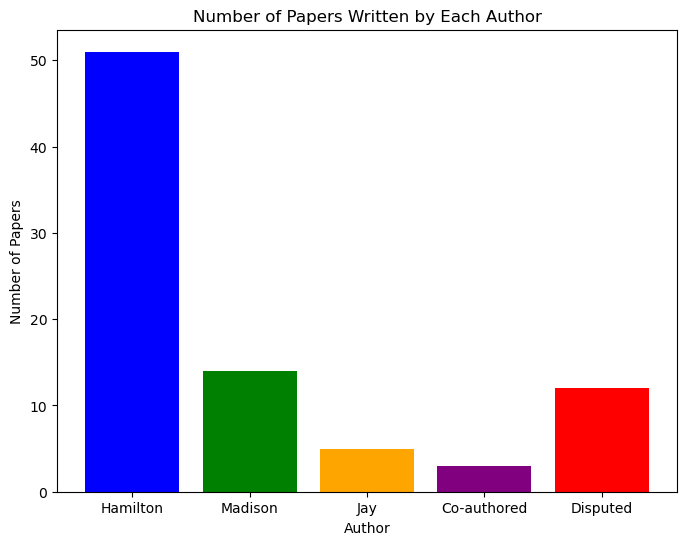

In [446]:
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(authors, counts, color=['blue', 'green', 'orange', 'purple', 'red'])
plt.title('Number of Papers Written by Each Author')
plt.xlabel('Author')
plt.ylabel('Number of Papers')
plt.show()

## **Data Exploration and Refinement**
The provided datasets require thorough exploration to understand their structure, identify potential issues, and ensure they are suitable for analysis. Key steps include:

- **Exploration**: Examine the datasets for dimensions, data types, and summary statistics to gain insights into their content and distribution.
- **Checking**: Identify and address missing values, duplicate rows, and outliers that could impact the analysis.
- **Refinement**: Transform and preprocess the data as needed, including normalization, feature selection, and handling of zero or near-zero variance features.


### **Cleaning Data**

##### Checking for null data

In [447]:
# df_1gram.isnull()
# df_2gram.isnull()
print(df_1gram.isnull().sum())
print("\n",df_2gram.isnull().sum())

Paper_ID      0
Author        0
the           0
of            0
to            0
             ..
extraneous    0
extracts      0
extra         0
extortion     0
zealous       0
Length: 8728, dtype: int64

 Paper_ID         0
Author           0
of the           0
to the           0
in the           0
                ..
for obtaining    0
for offenses     0
for on           0
for one          0
zealous they     0
Length: 70825, dtype: int64


##### Checking for duplicates

In [448]:
duplicate_rows = df_1gram.duplicated()
duplicate_rows_2gram = df_2gram.duplicated()
print(f"Number of duplicate rows in 1gram: {duplicate_rows.sum()}")
print(f"Number of duplicate rows in 2-gram: {duplicate_rows_2gram.sum()}")

Number of duplicate rows in 1gram: 0
Number of duplicate rows in 2-gram: 0


#### End of Data cleaning

No duplicate rows or null data points were found! We don't need to remove anything, so let's keep moving

### **Visualizing the Data**

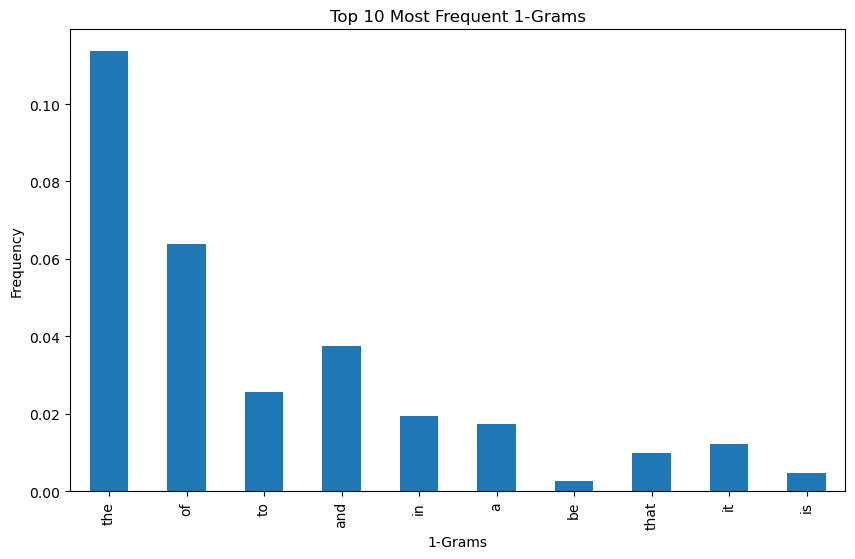

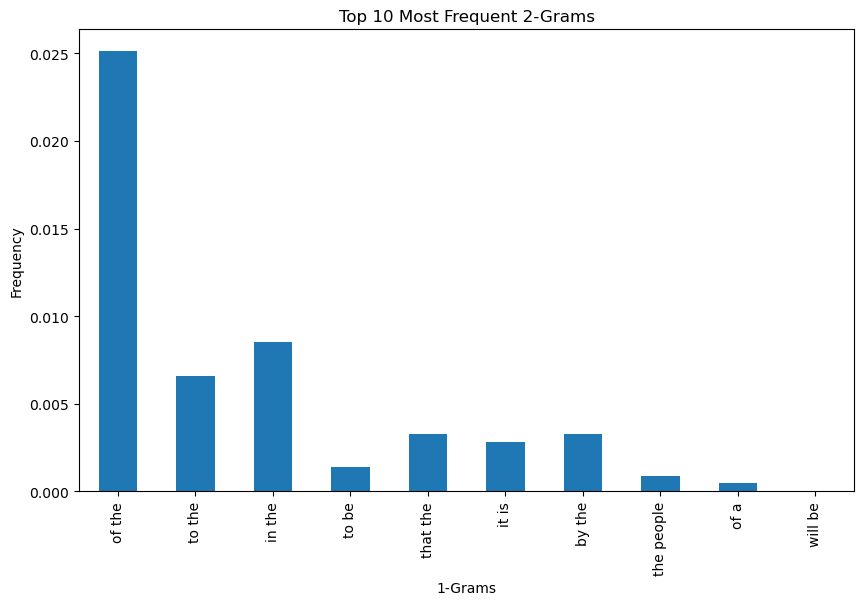

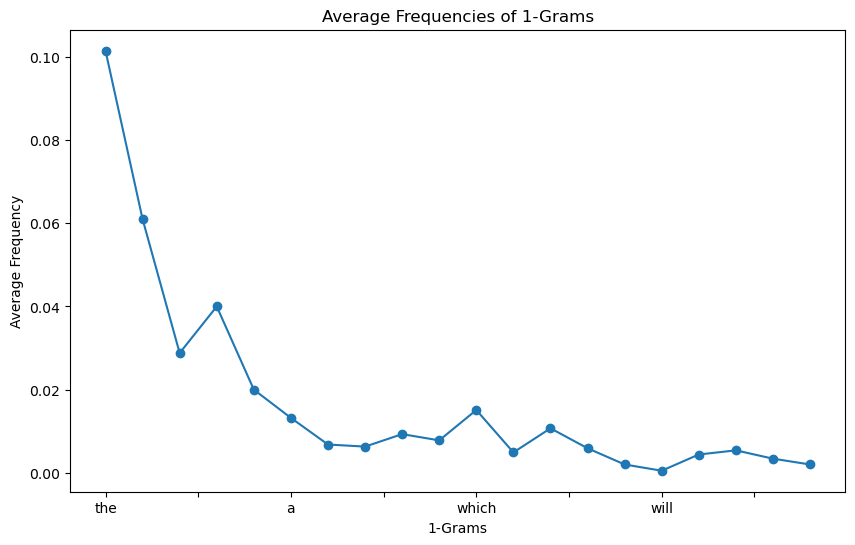

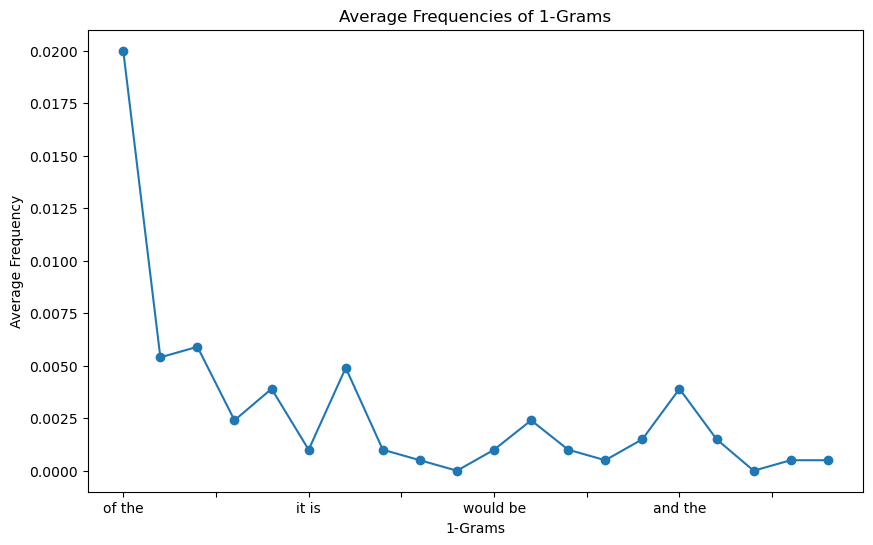

In [449]:
# Visualize the data using three different graphs

# Bar plot for the top 10 most frequent 1-grams
top_10_1gram = df_1gram.iloc[0, 2:12]  
top_10_1gram.plot(kind='bar', figsize=(10, 6), title='Top 10 Most Frequent 1-Grams')
plt.xlabel('1-Grams')
plt.ylabel('Frequency')
plt.show()

# Bar plot for the top 10 most frequent 2-grams
top_10_2gram = df_2gram.iloc[0, 2:12]  
top_10_2gram.plot(kind='bar', figsize=(10, 6), title='Top 10 Most Frequent 2-Grams')
plt.xlabel('1-Grams')
plt.ylabel('Frequency')
plt.show()

# Line plot for the average frequencies of 1-grams
average_1gram = df_1gram.iloc[1, 2:22]  # Assuming the second row contains average frequencies
average_1gram.plot(kind='line', figsize=(10, 6), marker='o', title='Average Frequencies of 1-Grams')
plt.xlabel('1-Grams')
plt.ylabel('Average Frequency')
plt.show()

# Line plot for the average frequencies of 2-grams
average_2gram = df_2gram.iloc[1, 2:22]  # Assuming the second row contains average frequencies
average_2gram.plot(kind='line', figsize=(10, 6), marker='o', title='Average Frequencies of 1-Grams')
plt.xlabel('1-Grams')
plt.ylabel('Average Frequency')
plt.show()

## **Cluster Analysis**

### Clustering known author's papers

For general pattern seeking to group points based on similarity, to deal with the high dimensionality of the data, and for a 2D visualization of our data, we will perform first a K-means clustering. More on the topic [here](https://www.geeksforgeeks.org/k-means-clustering-introduction/)

We will create a new dataframe containing only the papers whose author's are known in order to maintain the original data unchanged, avoid unintended side effects, and facilitate experimentation. Contested and coauthored papers will be used for classification

In [450]:
# copy of the original dataframe to be worked on, only containing papers written by either Hamilton, Madison, or Jay
all_papers_known_authors = df_1gram[df_1gram['Author'].isin(['H', 'M', 'J'])]

all_papers_known_authors

,Paper_ID,Author,the,of,to,and,in,a,be,that,...,extremities,extremes,extremely,extravagancies,extravagance,extraneous,extracts,extra,extortion,zealous
17,FED_1_H,H,0.0817,0.0656,0.0446,0.0248,0.0167,0.0155,0.0211,0.0173,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
18,FED_6_H,H,0.0819,0.0759,0.0286,0.0365,0.0271,0.0232,0.0089,0.0108,...,0.0,0.0000,0.0000,0.0,0.0005,0.0,0.0,0.0,0.0,0.0
19,FED_7_H,H,0.0898,0.0685,0.0356,0.0221,0.0187,0.0208,0.0204,0.0117,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
20,FED_8_H,H,0.0768,0.0656,0.0389,0.0262,0.0204,0.0224,0.0170,0.0087,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
21,FED_9_H,H,0.0853,0.0778,0.0356,0.0226,0.0186,0.0236,0.0130,0.0125,...,0.0,0.0005,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,FED_44_M,M,0.1086,0.0590,0.0279,0.0303,0.0228,0.0148,0.0186,0.0097,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
83,FED_45_M,M,0.1308,0.0673,0.0311,0.0296,0.0188,0.0094,0.0245,0.0141,...,0.0,0.0000,0.0005,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
84,FED_46_M,M,0.1156,0.0618,0.0328,0.0279,0.0176,0.0160,0.0275,0.0149,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
85,FED_47_M,M,0.1191,0.0681,0.0237,0.0313,0.0226,0.0128,0.0128,0.0131,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0


Same for the 2-grams

In [451]:
# copy of the original dataframe to be worked on, only containing papers written by either Hamilton, Madison, or Jay
all_papers_known_authors_2gram = df_2gram[df_2gram['Author'].isin(['H', 'M', 'J'])]
all_papers_known_authors_2gram

,Paper_ID,Author,of the,to the,in the,to be,that the,it is,by the,the people,...,for nominating,for not,for nothing,for objection,for objections,for obtaining,for offenses,for on,for one,zealous they
17,FED_1_H,H,0.0192,0.0081,0.0050,0.0037,0.0025,0.0025,0.0012,0.0037,...,0.0,0.0,0.0006,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,FED_6_H,H,0.0163,0.0049,0.0074,0.0030,0.0005,0.0010,0.0025,0.0015,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,FED_7_H,H,0.0195,0.0061,0.0074,0.0026,0.0022,0.0026,0.0043,0.0004,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,FED_8_H,H,0.0146,0.0049,0.0053,0.0039,0.0015,0.0019,0.0015,0.0034,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,FED_9_H,H,0.0201,0.0075,0.0055,0.0030,0.0025,0.0035,0.0010,0.0015,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,FED_44_M,M,0.0255,0.0110,0.0066,0.0024,0.0028,0.0010,0.0048,0.0017,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,FED_45_M,M,0.0315,0.0141,0.0085,0.0038,0.0071,0.0028,0.0033,0.0071,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,FED_46_M,M,0.0252,0.0084,0.0050,0.0031,0.0076,0.0011,0.0023,0.0103,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,FED_47_M,M,0.0270,0.0069,0.0077,0.0044,0.0058,0.0018,0.0098,0.0004,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


And now all the co-authored and disputed papers

In [452]:
all_papers_unknown_authors = df_1gram[df_1gram['Author'].isin(['C', 'D'])]
all_papers_unknown_authors

,Paper_ID,Author,the,of,to,and,in,a,be,that,...,extremities,extremes,extremely,extravagancies,extravagance,extraneous,extracts,extra,extortion,zealous
2,FED_18_C,C,0.1136,0.0639,0.0256,0.0374,0.0194,0.0175,0.0028,0.0099,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
3,FED_19_C,C,0.1015,0.0610,0.0288,0.0400,0.0200,0.0132,0.0068,0.0063,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
4,FED_20_C,C,0.0901,0.0533,0.0276,0.0355,0.0257,0.0184,0.0046,0.0059,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
5,FED_49_D,D,0.1077,0.0611,0.0351,0.0254,0.0206,0.0200,0.0284,0.0127,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
6,FED_50_D,D,0.0911,0.0541,0.0252,0.0298,0.0252,0.0126,0.0280,0.0108,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
7,FED_51_D,D,0.1052,0.0588,0.0260,0.0208,0.0260,0.0239,0.0328,0.0130,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
8,FED_52_D,D,0.1005,0.0546,0.0389,0.0200,0.0178,0.0189,0.0249,0.0162,...,0.0,0.0000,0.0005,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
9,FED_53_D,D,0.0894,0.0590,0.0336,0.0286,0.0207,0.0221,0.0235,0.0111,...,0.0,0.0005,0.0005,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
10,FED_54_D,D,0.1017,0.0584,0.0304,0.0190,0.0324,0.0175,0.0200,0.0140,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
11,FED_55_D,D,0.0891,0.0597,0.0382,0.0235,0.0147,0.0235,0.0250,0.0157,...,0.0,0.0000,0.0000,0.0005,0.0,0.0,0.0,0.0,0.0,0.0


And 2gram once more

In [453]:
all_papers_unknown_authors_2gram = df_2gram[df_2gram['Author'].isin(['C', 'D'])]
all_papers_unknown_authors_2gram

,Paper_ID,Author,of the,to the,in the,to be,that the,it is,by the,the people,...,for nominating,for not,for nothing,for objection,for objections,for obtaining,for offenses,for on,for one,zealous they
2,FED_18_C,C,0.0251,0.0066,0.0085,0.0014,0.0033,0.0028,0.0033,0.0009,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0
3,FED_19_C,C,0.0200,0.0054,0.0059,0.0024,0.0039,0.0010,0.0049,0.0010,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0
4,FED_20_C,C,0.0145,0.0033,0.0072,0.0026,0.0013,0.0026,0.0033,0.0007,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0007,0.0007,0.0
5,FED_49_D,D,0.0242,0.0097,0.0079,0.0115,0.0036,0.0030,0.0054,0.0103,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0
6,FED_50_D,D,0.0208,0.0054,0.0099,0.0099,0.0027,0.0009,0.0027,0.0036,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0
7,FED_51_D,D,0.0234,0.0042,0.0099,0.0026,0.0026,0.0036,0.0026,0.0036,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0
8,FED_52_D,D,0.0222,0.0076,0.0076,0.0076,0.0043,0.0038,0.0076,0.0065,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0
9,FED_53_D,D,0.0175,0.0097,0.0055,0.0037,0.0018,0.0032,0.0074,0.0028,...,0.0,0.0,0.0,0.0,0.0,0.0005,0.0,0.0000,0.0000,0.0
10,FED_54_D,D,0.0170,0.0075,0.0110,0.0105,0.0040,0.0060,0.0045,0.0020,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0
11,FED_55_D,D,0.0186,0.0069,0.0044,0.0083,0.0049,0.0020,0.0044,0.0044,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0


We want to perform PCA soon, but first we need to normalize our data

In [454]:
# Normalize the 1-gram dataset
scaler_1gram = StandardScaler()
X_normalized_1gram = scaler_1gram.fit_transform(all_papers_known_authors.iloc[:, 2:].select_dtypes(include=[np.number]))

# Normalize the 2-gram dataset
scaler_2gram = StandardScaler()
X_normalized_2gram = scaler_2gram.fit_transform(all_papers_known_authors_2gram.iloc[:, 2:].select_dtypes(include=[np.number]))

Principal Component Analysis (PCA) is necessary at this step to reduce the high dimensionality of the dataset, which contains thousands of features. By projecting the data onto a lower-dimensional space, PCA helps to capture the most significant patterns and variations in the data while discarding noise and redundant information. This dimensionality reduction is crucial for visualizing the data in two dimensions and for improving the efficiency and interpretability of subsequent clustering and classification tasks. More on the topic [here](https://www.geeksforgeeks.org/principal-component-analysis-pca/)

In [455]:
# Performing PCA
pca = PCA(n_components=2)
X_numeric = all_papers_known_authors.select_dtypes(include=[np.number])
X_pca = pca.fit_transform(X_numeric)

# now wth 2grams
pca_2gram = PCA(n_components=2)
X_numeric_2grams = all_papers_known_authors_2gram.select_dtypes(include=[np.number])
X_pca_2gram = pca_2gram.fit_transform(X_numeric_2grams)

Now we can do K-means clustering

c:\Users\gabal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


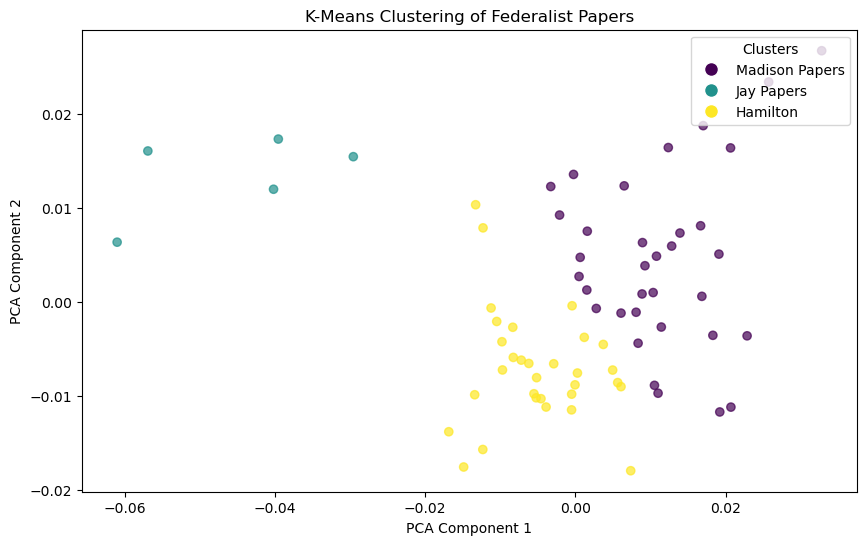

In [456]:
# Perform K-Means clustering on 1-gram
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters
clusters = kmeans.fit_predict(X_pca)

# Define cluster labels (update these based on your data)
cluster_labels = {
    0: "Madison Papers",
    1: "Jay Papers",
    2: "Hamilton"
}

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)

# Add a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10)
           for i in range(len(cluster_labels))]
plt.legend(handles, cluster_labels.values(), title="Clusters", loc="upper right")

# Add titles and labels
plt.title('K-Means Clustering of Federalist Papers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

We can clearly the clusters well separated, indicating the stylistic differences of each author, demonstrating that our clustering is well aligined with the known authorship of the papers
Let's see how the 2gram clusters will look like

c:\Users\gabal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


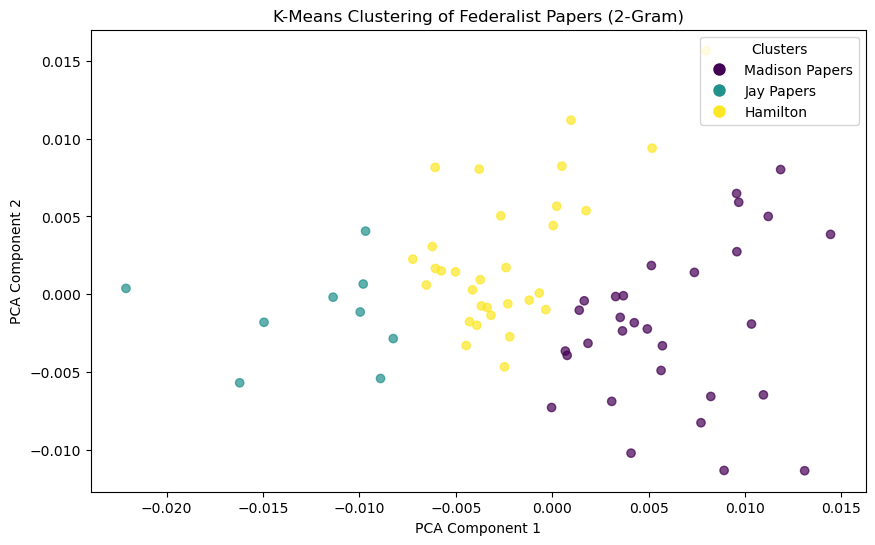

In [457]:
# Perform K-Means clustering on 2-gram
kmeans_2gram = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters
clusters_2gram = kmeans_2gram.fit_predict(X_pca_2gram)

# Define cluster labels (update these based on your data)
cluster_labels_2gram = {
    0: "Madison Papers",
    1: "Jay Papers",
    2: "Hamilton"
}

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter_2gram = plt.scatter(X_pca_2gram[:, 0], X_pca_2gram[:, 1], c=clusters_2gram, cmap='viridis', alpha=0.7)

# Add a legend
handles_2gram = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter_2gram.cmap(scatter_2gram.norm(i)), markersize=10)
                 for i in range(len(cluster_labels_2gram))]
plt.legend(handles_2gram, cluster_labels_2gram.values(), title="Clusters", loc="upper right")

# Add titles and labels
plt.title('K-Means Clustering of Federalist Papers (2-Gram)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Clustering subsets of the data

### Making subsets of the data to cluster on

To avoid a messy dendogram with all 85 texts, we will make subsets from the Hamilton, Madison, and Jay papers, with only 5 papers each 
First, let's divide our dataframes into subsets for each category (H, M, J, Coauthored, and Disputed)

In [458]:
# Subset for papers by Madison
madison_papers = all_papers_known_authors[all_papers_known_authors['Author'] == 'M']

# Subset for papers by Hamilton
hamilton_papers = all_papers_known_authors[all_papers_known_authors['Author'] == 'H']

# Subset for papers by Jay
jay_papers = all_papers_known_authors[all_papers_known_authors['Author'] == 'J']

# Subset for disputed papers 
disputed_papers = all_papers_unknown_authors[all_papers_unknown_authors['Author'] == 'D']

# Subset for co-authored papers 
coauthored_papers = all_papers_unknown_authors[all_papers_unknown_authors['Author'] == 'C']

# Display the shapes of the subsets
print(f"Madison Papers: {madison_papers.shape}")
print(f"Hamilton Papers: {hamilton_papers.shape}")
print(f"Jay Papers: {jay_papers.shape}")
print(f"Disputed Papers: {disputed_papers.shape}")
print(f"Co-authored Papers: {coauthored_papers.shape}")

Madison Papers: (14, 8728)
Hamilton Papers: (51, 8728)
Jay Papers: (5, 8728)
Disputed Papers: (12, 8728)
Co-authored Papers: (3, 8728)


In [459]:
# Subset for papers by Madison
madison_papers_2gram = all_papers_known_authors_2gram[all_papers_known_authors_2gram['Author'] == 'M']

# Subset for papers by Hamilton
hamilton_papers_2gram = all_papers_known_authors_2gram[all_papers_known_authors_2gram['Author'] == 'H']

# Subset for papers by Jay
jay_papers_2gram = all_papers_known_authors_2gram[all_papers_known_authors_2gram['Author'] == 'J']

# Subset for disputed papers 
disputed_papers_2gram = all_papers_unknown_authors_2gram[all_papers_unknown_authors_2gram['Author'] == 'D']

# Subset for co-authored papers 
coauthored_papers_2gram = all_papers_unknown_authors_2gram[all_papers_unknown_authors_2gram['Author'] == 'C']

# Display the shapes of the subsets
print(f"Madison Papers (2-gram): {madison_papers_2gram.shape}")
print(f"Hamilton Papers (2-gram): {hamilton_papers_2gram.shape}")
print(f"Jay Papers (2-gram): {jay_papers_2gram.shape}")
print(f"Disputed Papers (2-gram): {disputed_papers_2gram.shape}")
print(f"Co-authored Papers (2-gram): {coauthored_papers_2gram.shape}")

Madison Papers (2-gram): (14, 70825)
Hamilton Papers (2-gram): (51, 70825)
Jay Papers (2-gram): (5, 70825)
Disputed Papers (2-gram): (12, 70825)
Co-authored Papers (2-gram): (3, 70825)


Now lets make smaller subsets with only 5 papers from each author

In [460]:
# Create subsets with 5 papers from each author, excluding co-authored and disputed papers
madison_subset = madison_papers.sample(n=5, random_state=42)  # Randomly pick 5 papers from Madison
hamilton_subset = hamilton_papers.sample(n=5, random_state=42)  # Randomly pick 5 papers from Hamilton
jay_subset = jay_papers.sample(n=5, random_state=42)  # Randomly pick 5 papers from Jay

# Combine the subsets into one DataFrame
subset_combined = pd.concat([madison_subset, hamilton_subset, jay_subset])

# Display the shapes of the subsets
print(f"Madison Subset: {madison_subset.shape}")
print(f"Hamilton Subset: {hamilton_subset.shape}")
print(f"Jay Subset: {jay_subset.shape}")
print(f"Combined Subset: {subset_combined.shape}")

# And now for the 2gram data
madison_subset_2gram = madison_papers_2gram.sample(n=5, random_state=42)  # Randomly pick 5 papers from Madison
hamilton_subset_2gram = hamilton_papers_2gram.sample(n=5, random_state=42)  # Randomly pick 5 papers from Hamilton
jay_subset_2gram = jay_papers_2gram.sample(n=5, random_state=42)  # Randomly pick 5 papers from Jay

# Combine the subsets into one DataFrame
subset_combined_2gram = pd.concat([madison_subset_2gram, hamilton_subset_2gram, jay_subset_2gram])

# Display the shapes of the subsets
print(f"Madison Subset (2-gram): {madison_subset_2gram.shape}")
print(f"Hamilton Subset (2-gram): {hamilton_subset_2gram.shape}")
print(f"Jay Subset (2-gram): {jay_subset_2gram.shape}")
print(f"Combined Subset (2-gram): {subset_combined_2gram.shape}")


Madison Subset: (5, 8728)
Hamilton Subset: (5, 8728)
Jay Subset: (5, 8728)
Combined Subset: (15, 8728)
Madison Subset (2-gram): (5, 70825)
Hamilton Subset (2-gram): (5, 70825)
Jay Subset (2-gram): (5, 70825)
Combined Subset (2-gram): (15, 70825)


### Performing hierachical clustering and displaying it as a dendogram

We need to decide on our linkage method and accompanying metric for the hierarchical clustering. Since we are working with continuous data, and to minimize our variance within clusters, we will use **Ward's Method** as our linkage method. Ward's Method is specifically designated to work with **Euclidean distance** as its distance metric, as it minimizes the variance within clusters, which is inherently tied ot the squared Euclidean distance. More on Ward's Method [here](https://en.wikipedia.org/wiki/Ward%27s_method)

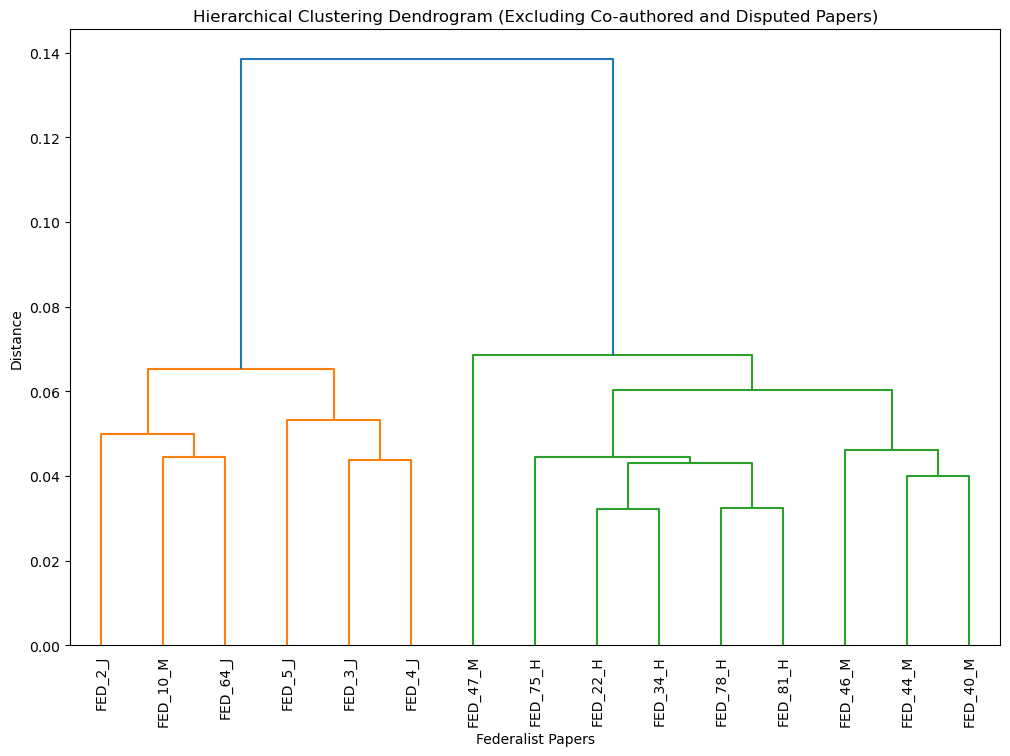

In [461]:
# Perform hierarchical clustering
linkage_matrix = linkage(subset_combined.iloc[:, 2:], method='ward')  # Exclude 'Paper_ID' and 'Author' columns

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=subset_combined['Paper_ID'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Excluding Co-authored and Disputed Papers)')
plt.xlabel('Federalist Papers')
plt.ylabel('Distance')
plt.show()

At first glance, Madison's, Jay's, and Hamilton's papers are grouped together. Interestingly, we can see one of Madison's papers closest to Jay's cluster, a potential outlier to be investigated further. Let's see what the 2gram data tells us

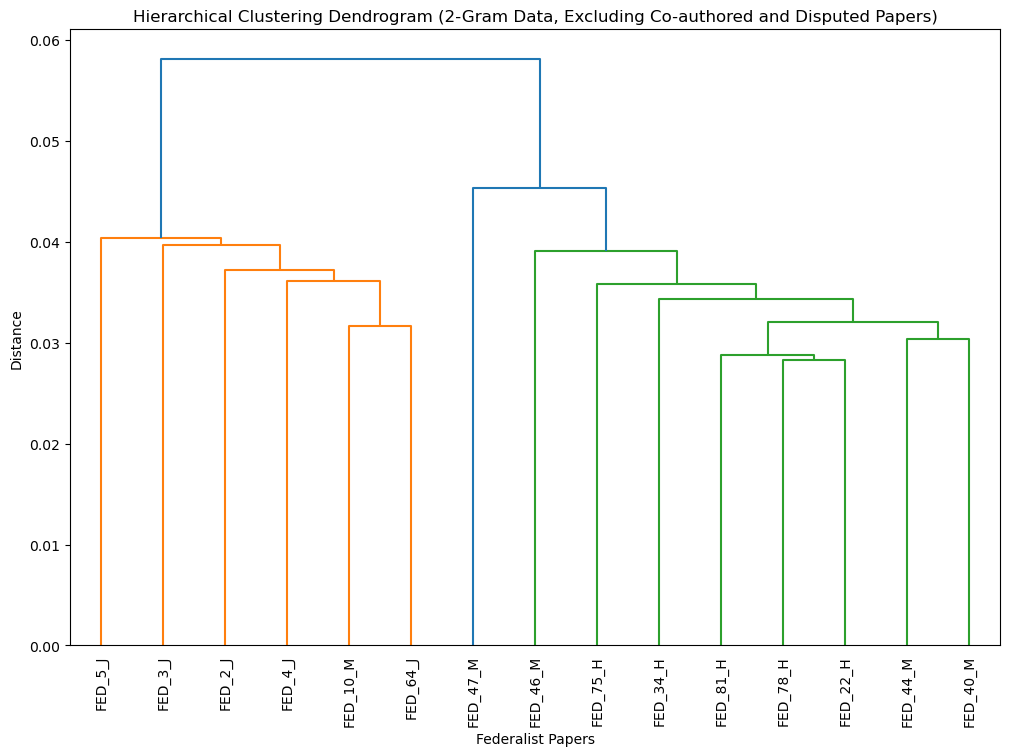

In [462]:
# Perform hierarchical clustering on 2-gram data
linkage_matrix_2gram = linkage(subset_combined_2gram.iloc[:, 2:], method='ward')  # Exclude 'Paper_ID' and 'Author' columns

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix_2gram, labels=subset_combined_2gram['Paper_ID'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (2-Gram Data, Excluding Co-authored and Disputed Papers)')
plt.xlabel('Federalist Papers')
plt.ylabel('Distance')
plt.show()

The hierarchical clustering results show that the 1-gram data provides clearer separation between authors, particularly for the Jay papers, which form a tight and distinct cluster. In contrast, the 2-gram dendrogram, while still grouping Jay papers reasonably well, shows more overlap and compressed distances, making author boundaries less visually distinct. Notably, FED_10_M appears close to the Jay cluster in both cases, suggesting possible stylistic similarities. Overall, the 1-gram features offer slightly more effective differentiation among the authors in this context.(ChatGPT (Version GPT-4))

## **Classification algorithms**

Now let's apply some different classification algorithms and see if we can predict the authorship of the papers, and even try to find who most likely wrote the disputed papers

#### Splitting the data

We must first separate our data into the train and test data. We will only have papers with confirmed authorship for our train data, and include the disputed papers in our test data

In [463]:
# Define X (features) and y (target labels)
X = df_1gram.drop(columns=['Paper_ID', 'Author'])  # Exclude 'Paper_ID' and 'Author' columns
y = df_1gram['Author']  # Use the already extracted Author column

# Verify the shapes of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (85, 8726)
Shape of y: (85,)


We will split the dataset into training and testing subsets. The training data will consist of papers with known authorship (Hamilton, Madison, and Jay), while the testing data will include disputed and co-authored papers. This separation ensures that the model is trained only on confirmed data, allowing us to evaluate its ability to predict the authorship of unknown papers. The features (`X`) will exclude non-numeric columns like `Paper_ID` and `Author`, while the target labels (`y`) will be the `Author` column. The shapes of the resulting datasets will also be printed for verification.
```

In [464]:
# split known-author and unknown-author data
mask_known = y.isin(["H", "M", "J"])
X_known = X[mask_known]
y_known = y[mask_known]

mask_unknown = y.isin(["D", "C"])
X_unknown = X[mask_unknown]
doc_ids_unknown = df_1gram[mask_unknown]["Paper_ID"]

# define y_test for disputed or co-authored papers
y_test = y[mask_unknown]

### Decision trees

Let's perform a Decision Tree, and train it with our know authroship data

In [465]:
tree_1grams = DecisionTreeClassifier(criterion="entropy", max_depth = 20)
tree_1grams.fit(X_known, y_known)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

Now let's used the trained Decision Tree Classifier to make predictions on the dataset `X_known`

In [466]:
predTree = tree_1grams.predict(X_known) #take the test data, and give the model's "guesses"

Let's find out how well we did and see our accuracy

In [467]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_known, predTree))

DecisionTrees's Accuracy:  1.0


Let's see how our tree looks like

|--- upon <= 0.00
|   |--- which <= 0.01
|   |   |--- occur <= 0.00
|   |   |   |--- class: J
|   |   |--- occur >  0.00
|   |   |   |--- class: H
|   |--- which >  0.01
|   |   |--- class: M
|--- upon >  0.00
|   |--- class: H



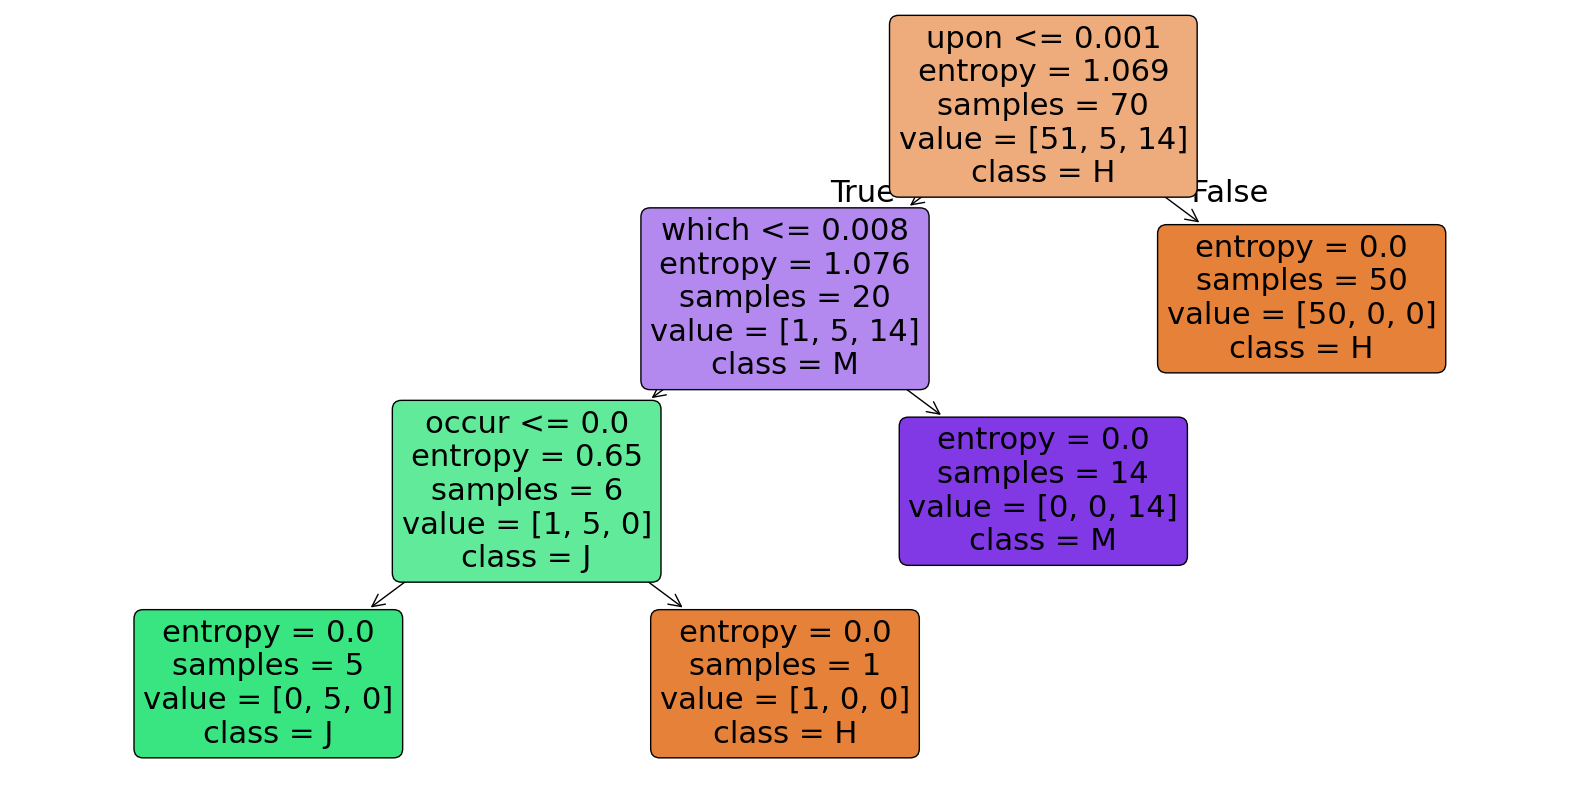

In [468]:
# Define class labels from y_known
class_labels = y_known.unique()

# Print the decision tree in text format
tree_rules = export_text(tree_1grams, feature_names=X_known.columns.tolist())
print(tree_rules)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_1grams, feature_names=X_known.columns, class_names=class_labels, filled=True, rounded=True)
plt.show()

### Support Vector Machine (SVM)

Let's use a different classification algorithm and use SVM. We will begin by training our SVM with the `X_known` and `y_known` datasets

In [469]:
clf = svm.SVC(kernel='rbf') # making the object, kernel is the optimization technique
clf.fit(X_known, y_known)

SVC()

In [470]:
# Predict the authorship of the known authorship papers using the trained SVM model
yhat_known = clf.predict(X_known)

# Convert y_known to a list for comparison
y_known_values = list(y_known)

# Create a DataFrame to compare actual and predicted authors
comparison_results = pd.DataFrame({
    'Paper_ID': df_1gram[mask_known]['Paper_ID'],  # Include Paper_ID for reference
    'Actual': y_known_values,
    'Predicted': yhat_known
})

# Print the comparison results
print(comparison_results)

    Paper_ID Actual Predicted
17   FED_1_H      H         H
18   FED_6_H      H         H
19   FED_7_H      H         H
20   FED_8_H      H         H
21   FED_9_H      H         H
..       ...    ...       ...
82  FED_44_M      M         H
83  FED_45_M      M         H
84  FED_46_M      M         H
85  FED_47_M      M         H
86  FED_48_M      M         H

[70 rows x 3 columns]


In [471]:
from sklearn.metrics import accuracy_score

# Measure the accuracy of the SVM model
svm_accuracy = accuracy_score(y_known, yhat_known)
print(f"SVM Model Accuracy: {svm_accuracy:.2f}")

SVM Model Accuracy: 0.76


Just as in statistics, yhat is a prediction of what the testset is going to be. Here it will show an array of all predictions from our test set.

In [472]:
yhat = clf.predict(X_unknown)
yhat [0:5]

array(['H', 'H', 'H', 'H', 'H'], dtype=object)

Let's see SVM prediction's for the coauthored and disputed papers

In [473]:
# Generate predictions for the test set (X_unknown)
yhat = clf.predict(X_unknown)

# Convert y_test to a list for comparison
y_testValues = list(y_test)

comparison_df = pd.DataFrame({
    'Paper_ID': doc_ids_unknown.values,  # Include Paper_ID for reference
    'Actual': y_testValues,
    'Predicted': yhat
})

# Print the comparison DataFrame
print(comparison_df)



    Paper_ID Actual Predicted
0   FED_18_C      C         H
1   FED_19_C      C         H
2   FED_20_C      C         H
3   FED_49_D      D         H
4   FED_50_D      D         H
5   FED_51_D      D         H
6   FED_52_D      D         H
7   FED_53_D      D         H
8   FED_54_D      D         H
9   FED_55_D      D         H
10  FED_56_D      D         H
11  FED_57_D      D         H
12  FED_58_D      D         H
13  FED_62_D      D         H
14  FED_63_D      D         H


SVM tells us that all of the coauthored and dispute papers look the most similar to Hamilton's writing style; let's see what others have to say about that

### Naive Bayes

Let's now use a Naive Bayes model, train with our known authroship papers, to then try again to predict those disputed and coauthored papers' authorship

In [474]:
# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_known, y_known)


GaussianNB()

In [475]:
# Predict the authorship of the known authorship papers using the trained Naive Bayes model
y_pred_nb_known = nb_model.predict(X_known)

# Create a DataFrame to compare actual and predicted authors
comparison_nb_known = pd.DataFrame({
    'Paper_ID': df_1gram[mask_known]['Paper_ID'],  # Include Paper_ID for reference
    'Actual': y_known.values,
    'Predicted': y_pred_nb_known
})

# Print the comparison results
print(comparison_nb_known)

# Calculate and print the accuracy of the Naive Bayes model
nb_accuracy_known = accuracy_score(y_known, y_pred_nb_known)
print(f"Naive Bayes Model Accuracy on Known Papers: {nb_accuracy_known:.2f}")

    Paper_ID Actual Predicted
17   FED_1_H      H         H
18   FED_6_H      H         H
19   FED_7_H      H         H
20   FED_8_H      H         H
21   FED_9_H      H         H
..       ...    ...       ...
82  FED_44_M      M         M
83  FED_45_M      M         M
84  FED_46_M      M         M
85  FED_47_M      M         M
86  FED_48_M      M         M

[70 rows x 3 columns]
Naive Bayes Model Accuracy on Known Papers: 1.00


100% accuracy! Not bad at all

In [476]:
# Make predictions
y_pred_nb = nb_model.predict(X_unknown)

# Create a DataFrame to compare actual and predicted authors
comparison_df = pd.DataFrame({
    'Paper_ID': doc_ids_unknown.values,
    'Actual': y_test.values,
    'Predicted': y_pred_nb
})

# Print the comparison DataFrame
print(comparison_df)

    Paper_ID Actual Predicted
0   FED_18_C      C         H
1   FED_19_C      C         H
2   FED_20_C      C         H
3   FED_49_D      D         H
4   FED_50_D      D         H
5   FED_51_D      D         H
6   FED_52_D      D         H
7   FED_53_D      D         H
8   FED_54_D      D         M
9   FED_55_D      D         H
10  FED_56_D      D         H
11  FED_57_D      D         H
12  FED_58_D      D         H
13  FED_62_D      D         H
14  FED_63_D      D         H


Once again, our model shows that majority of these papers seem to have been written by Hamilton, besides #54

Now let's do all of the above for the 2gram data in an elegant way with a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), a tool that lets us chain together multiple steps (like preprocessing + modeling) into a single, unified object.

In [477]:
X_known_2gram = all_papers_known_authors_2gram.drop(columns=['Paper_ID', 'Author']).select_dtypes(include=[np.number])
y_known_2gram = all_papers_known_authors_2gram['Author']

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB()
}

# Evaluate each model with cross-validation
for name, model in models.items():
    pipe = Pipeline([
        ("scaler", StandardScaler(with_mean=False)),
        ("clf", model)
    ])
    scores = cross_val_score(pipe, X_known_2gram, y_known_2gram, cv=5, scoring="accuracy")
    print(f"{name} Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

Decision Tree Accuracy: 0.829 ± 0.086
SVM Accuracy: 0.729 ± 0.029
Naive Bayes Accuracy: 0.800 ± 0.053


As a refresher, let's see how our models did with the 1-gram data

In [478]:
# Print the accuracy of the three models on 1-gram data
print(f"Decision Tree Accuracy on 1-gram data: {metrics.accuracy_score(y_known, predTree):.2f}")
print(f"SVM Accuracy on 1-gram data: {svm_accuracy:.2f}")
print(f"Naive Bayes Accuracy on 1-gram data: {nb_accuracy_known:.2f}")


Decision Tree Accuracy on 1-gram data: 1.00
SVM Accuracy on 1-gram data: 0.76
Naive Bayes Accuracy on 1-gram data: 1.00


Let's plot this out

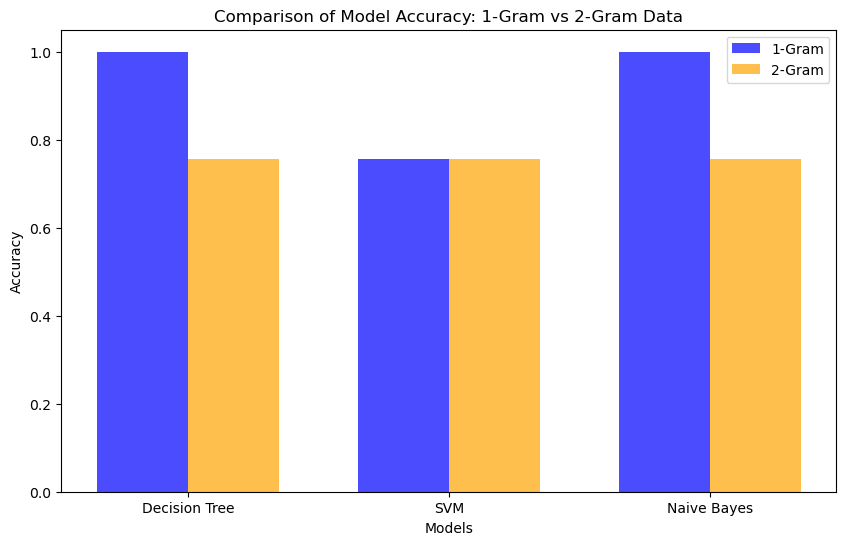

In [479]:
# Accuracy values for each model
models = ['Decision Tree', 'SVM', 'Naive Bayes']
accuracy_1gram = [
    metrics.accuracy_score(y_known, predTree),  # Decision Tree accuracy on 1-gram
    svm_accuracy,                              # SVM accuracy on 1-gram
    nb_accuracy_known                          # Naive Bayes accuracy on 1-gram
]

accuracy_2gram = [
    0.757,  # Decision Tree accuracy on 2-gram (from cross-validation)
    0.757,  # SVM accuracy on 2-gram (from cross-validation)
    0.757   # Naive Bayes accuracy on 2-gram (from cross-validation)
]

# Create a bar plot
x = range(len(models))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, accuracy_1gram, width, label='1-Gram', color='blue', alpha=0.7)
plt.bar([i + width for i in x], accuracy_2gram, width, label='2-Gram', color='orange', alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy: 1-Gram vs 2-Gram Data')
plt.xticks([i + width / 2 for i in x], models)
plt.legend()

# Show the plot
plt.show()

## Predictions

In [481]:
# Preprocess X_unknown to match the format of X_known_2gram
X_unknown_2gram = X_unknown.select_dtypes(include=[np.number])  # Select numeric columns
X_unknown_2gram = X_unknown_2gram.iloc[:, :X_known_2gram.shape[1]]  # Ensure column alignment

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB()
}
# Align the columns of X_unknown_2gram with X_known_2gram
X_unknown_2gram = X_unknown_2gram.reindex(columns=X_known_2gram.columns, fill_value=0)

# Create a DataFrame to store predictions for disputed and coauthored papers
comparison_df = pd.DataFrame({
    'Paper_ID': doc_ids_unknown.values,  # Include Paper_ID for reference
    'Actual': y_test.values,             # Actual authorship
    'Decision Tree (1-gram)': tree_1grams.predict(X_unknown),  # Decision Tree predictions (1-gram)
    'SVM (1-gram)': clf.predict(X_unknown),                   # SVM predictions (1-gram)
    'Naive Bayes (1-gram)': nb_model.predict(X_unknown),      # Naive Bayes predictions (1-gram)
    'Decision Tree (2-gram)': models["Decision Tree"].fit(X_known_2gram, y_known_2gram).predict(X_unknown_2gram),  # Decision Tree predictions (2-gram)
    'SVM (2-gram)': models["SVM"].fit(X_known_2gram, y_known_2gram).predict(X_unknown_2gram),                    # SVM predictions (2-gram)
    'Naive Bayes (2-gram)': models["Naive Bayes"].fit(X_known_2gram, y_known_2gram).predict(X_unknown_2gram)     # Naive Bayes predictions (2-gram)
})

# Display the comparison DataFrame
print(comparison_df)

    Paper_ID Actual Decision Tree (1-gram) SVM (1-gram) Naive Bayes (1-gram)  \
0   FED_18_C      C                      J            H                    H   
1   FED_19_C      C                      M            H                    H   
2   FED_20_C      C                      M            H                    H   
3   FED_49_D      D                      M            H                    H   
4   FED_50_D      D                      M            H                    H   
5   FED_51_D      D                      J            H                    H   
6   FED_52_D      D                      M            H                    H   
7   FED_53_D      D                      M            H                    H   
8   FED_54_D      D                      M            H                    M   
9   FED_55_D      D                      M            H                    H   
10  FED_56_D      D                      M            H                    H   
11  FED_57_D      D                     

This table compares authorship predictions for the disputed and co-authored Federalist Papers using three classification models—Decision Tree, SVM, and Naive Bayes—on both 1-gram and 2-gram data. A striking observation is that the SVM and Naive Bayes classifiers consistently predict Hamilton as the author across nearly all papers, regardless of whether 1-gram or 2-gram features are used. In contrast, the Decision Tree model using 1-gram data shows more variation, frequently attributing authorship to Madison, while the 2-gram Decision Tree unexpectedly predicts Jay as the author for every single paper. This suggests that the Decision Tree model, when trained on 2-gram features, may be overfitting or overly influenced by stylistic quirks common to Jay’s known papers. Overall, while SVM and Naive Bayes appear more stable in their predictions, the inconsistency between 1-gram and 2-gram Decision Tree results highlights the importance of carefully interpreting model behavior across different feature sets.

## **Bibliography**
- Jockers, M. L., & Witten, D. M. (2010). A comparative study of machine learning methods for authorship attribution.  
- Kleinman, S., et al. (2019). Lexos: A Text Analysis Tool.
- GitHub Copilot, powered by OpenAI's GPT-4 model.
- Google's Gemini, developed by Google DeepMind.  
- OpenAI's Chat GPT-4.  